In [1]:
import pandas as pd
from pynsee.sirene import search_sirene, get_sirene_relatives, get_sirene_data
from pynsee.utils.init_conn import init_conn
import requests
import matplotlib.pyplot as plt

In [3]:
parcelles = pd.read_csv('Parcelles des personnes morales.csv')

C:\Users\RémiJAYLET\AppData\Local\Temp\ipykernel_18008\1109412914.py:1: DtypeWarning: Columns (0,1,15) have mixed types. Specify dtype option on import or set low_memory=False.
  parcelles = pd.read_csv('Parcelles des personnes morales.csv')


In [4]:
parcelles.head(3)

,Département,Code Commune,Nom Commune,Adresse,Code parcelle,Code voie MAJIC,Code voie rivoli,Contenance parcelle,SUF,Nature culture,Contenance SUF,Code droit,N° MAJIC,N° SIREN,Groupe personne,Code forme juridique,Forme juridique abrégée,Dénomination,Longitude,Latitude
0,1,1001,L'ABERGEMENT-CLEMENCIAT,CHAMP MACONNAIS,010010000A0017,10.0,B010,120,A,BS,100,P,PBB32P,U21651623,Personnes morales non remarquables,9900,NaN,PROPRIETAIRES DU BND 001 A0017,4.923183,46.17799
1,1,1001,L'ABERGEMENT-CLEMENCIAT,CHAMP MACONNAIS,010010000A0017,10.0,B010,120,B,BS,13,P,PBB32P,U21651623,Personnes morales non remarquables,9900,NaN,PROPRIETAIRES DU BND 001 A0017,4.923183,46.17799
2,1,1001,L'ABERGEMENT-CLEMENCIAT,CHAMP MACONNAIS,010010000A0017,10.0,B010,120,C,BS,7,P,PBB32P,U21651623,Personnes morales non remarquables,9900,NaN,PROPRIETAIRES DU BND 001 A0017,4.923183,46.17799


In [5]:
parcelles.isna().sum()

Département                       0
Code Commune                      0
Nom Commune                       0
Adresse                        1025
Code parcelle                     0
Code voie MAJIC                 234
Code voie rivoli                234
Contenance parcelle               0
SUF                        15476747
Nature culture                    0
Contenance SUF                    0
Code droit                        0
N° MAJIC                          0
N° SIREN                      33950
Groupe personne               70749
Code forme juridique              0
Forme juridique abrégée     3061300
Dénomination                     23
Longitude                    259051
Latitude                     259050
dtype: int64

In [6]:
unknown_siret = parcelles.dropna(subset=['N° SIREN'])
unknown_siret = unknown_siret[unknown_siret['N° SIREN'].str.startswith('U')]
print('num siret fictif :', len(unknown_siret))

num siret fictif : 4968141


In [7]:
parcelles_idf = parcelles[parcelles.Département == 75]

In [19]:
parcelles_idf.head(3)

,Département,Code Commune,Nom Commune,Adresse,Code parcelle,Code voie MAJIC,Code voie rivoli,Contenance parcelle,SUF,Nature culture,Contenance SUF,Code droit,N° MAJIC,N° SIREN,Groupe personne,Code forme juridique,Forme juridique abrégée,Dénomination,Longitude,Latitude
15690668,75,75101,PARIS 01,QUAI DES TUILERIES,75101000AB0001,222.0,9492,1731,NaN,S,1731,P,PBBLBB,U22338864,État,7113,ETAT,MINISTERE DE LA CULTURE ET DE LA COMMUNICATION,2.322647,48.863791
15690669,75,75101,PARIS 01,"0020, QUAI DES TUILERIES",75101000AB0002,222.0,9492,45688,NaN,AG,45688,P,PBBLBB,U22338864,État,7113,ETAT,MINISTERE DE LA CULTURE ET DE LA COMMUNICATION,2.322690,48.863845
15690670,75,75101,PARIS 01,JARDIN DES TUILERIES,75101000AC0001,220.0,9490,993,NaN,S,993,P,PBBLBB,U22338864,État,7113,ETAT,MINISTERE DE LA CULTURE ET DE LA COMMUNICATION,2.324082,48.865814


<Axes: ylabel='Adresse'>

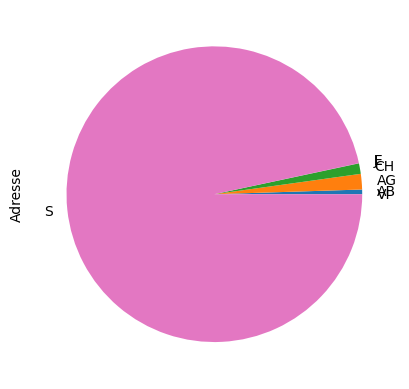

In [21]:
parcelles_idf.groupby(['Nature culture']).count()['Adresse'].plot(kind='pie')

<Axes: ylabel='Adresse'>

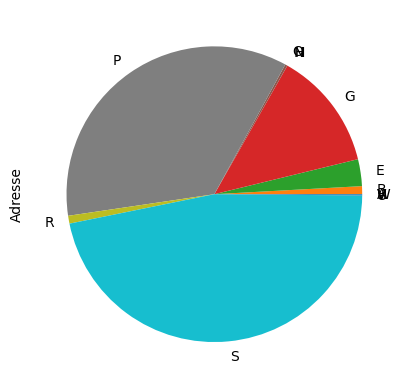

In [22]:
parcelles_idf.groupby(['Code droit']).count()['Adresse'].plot(kind='pie')

<Axes: ylabel='Adresse'>

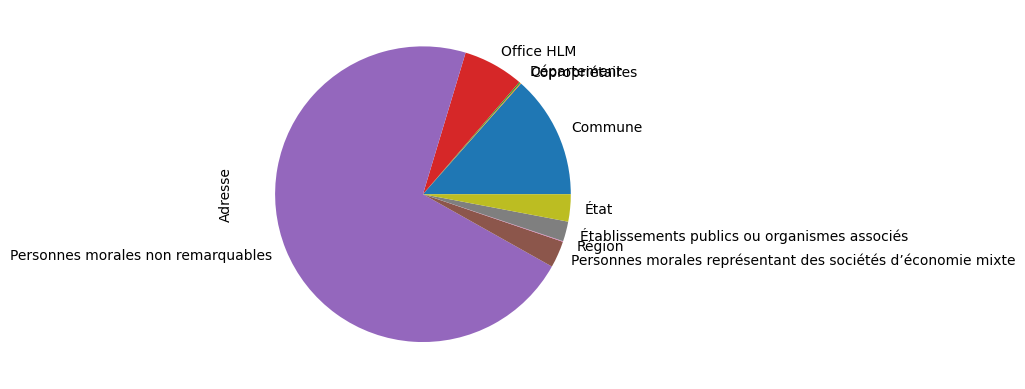

In [23]:
parcelles_idf.groupby(['Groupe personne']).count()['Adresse'].plot(kind='pie')

<Axes: ylabel='Adresse'>

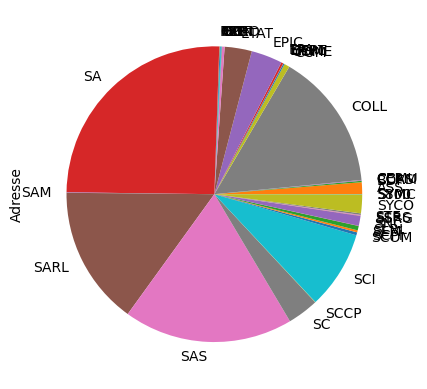

In [24]:
parcelles_idf.groupby(['Forme juridique abrégée']).count()['Adresse'].plot(kind='pie')